## **Задание №2**

### Построение и оценка качества бейзлайна

#### Задачи:
В рамках данного этапа необходимо:
1. Выбрать и обучить бейзлайн-модели.
2. Измерить качество предсказаний.


#### Критерии оценки:

- **Разбиение датасета на тренировочную/тестовую выборки**  
  _2 балла_  
  Датасет должен быть корректно разделён на обучающую и тестовую выборки.

- **Измерение качества константного предсказания**  
  _3 балла_  
  Для задачи регрессии нужно использовать предсказания, основанные на простых константных значениях:
  - Среднее значение целевой переменной.
  - Медиана целевой переменной.

- **Обучение бейзлайновой модели**  
  _6 баллов_  
  Использовать простую модель, такую как:
  - Линейная регрессия.

- **Оценка качества на тестовой выборке**  
  _2 балла_  
  Измерить качество модели на отложенной выборке, используя выбранную метрику (например, `MAE`, `RMSE` или `R2`).

- **Воспроизводимость решения**  
  _3 балла_  
  - Зафиксировать `random_state` для всех случайных процессов.
  - Убедиться, что ноутбук воспроизводится от начала до конца без ошибок.

- **Соблюдение code style**  
  _4 балла_  
  - Код соответствует стандартам PEP8.
  - Jupyter Notebook оформлен в стиле "On writing clean Jupyter notebooks".

- **Обоснование принимаемых решений**  
  _10 баллов_  
  Каждое принятое решение должно быть прокомментировано в markdown-ячейках. Например:
  - Почему выбран метод кодирования категориальных переменных.
  - Почему используется определённая метрика для оценки качества.
  - Почему выбрана конкретная модель.

#### Ожидаемый результат:
1. Разделение данных на тренировочную и тестовую выборки.
2. Измерение качества константного предсказания (среднее/медиана).
3. Обучение бейзлайновой модели на тренировочной выборке.
4. Измерение качества модели на тестовой выборке.
5. Воспроизводимость работы ноутбука.
6. Чистый код и подробные пояснения.

### Импорт необходимых библиотек

In [ ]:
# визуализация данных
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# обработка данных
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

### Разбиение датасета 

In [62]:
# Подгрузка датасета 
df = pd.read_csv('../data/housing.csv')
print(f'Размер датасета : {df.shape}')
df

Размер датасета : (20640, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [63]:
# Целевая переменная
y = df['median_house_value']

# Признаки (все столбцы, кроме 'median_house_value')
X = df.drop(columns=['median_house_value'])

In [64]:
# Разделяем на тренировочную и тестовую выборки (80% на тренировочную, 20% на тестовую)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=21, test_size=0.2)

print(f"Размер тренировочной выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")

Размер тренировочной выборки: (16512, 9)
Размер тестовой выборки: (4128, 9)


#### Какую модель будем рассматривать?
`Линейная регрессия` лучше подходит для предсказания цены на жилье, так как она проста, интерпретируема, хорошо работает с непрерывными данными и эффективно выявляет линейные зависимости между ценой и признаками, такими как площадь, доход или возраст дома.

## Часть 1. Оценка пайплайна с стандартной обработкой данных

#### **Измерение качества константного предсказания**  

In [71]:
# Вычисляем среднее и медиану на тренировочной выборке
mean_y_train = y_train.mean()
median_y_train = y_train.median()

# Создаем константные предсказания для тестовой выборки
y_pred_mean = np.full_like(y_test, fill_value=mean_y_train, dtype=np.float64)
y_pred_median = np.full_like(y_test, fill_value=median_y_train, dtype=np.float64)

# Рассчитываем метрики качества для среднего
mse_mean = mean_squared_error(y_test, y_pred_mean)
mae_mean = mean_absolute_error(y_test, y_pred_mean)
r2_mean = r2_score(y_test, y_pred_mean)

# Рассчитываем метрики качества для медианы
mse_median = mean_squared_error(y_test, y_pred_median)
mae_median = mean_absolute_error(y_test, y_pred_median)
r2_median = r2_score(y_test, y_pred_median)

In [72]:
# Выводим результаты
print("Качество предсказания средней целевой переменной:")
print(f"MSE: {mse_mean:.2f}, MAE: {mae_mean:.2f}, R^2: {r2_mean:.2f}\n")

print("Качество предсказания медианной целевой переменной:")
print(f"MSE: {mse_median:.2f}, MAE: {mae_median:.2f}, R^2: {r2_median:.2f}")

Качество предсказания средней целевой переменной:
MSE: 13444379057.70, MAE: 91812.28, R^2: -0.00

Качество предсказания медианной целевой переменной:
MSE: 14229285220.88, MAE: 89100.31, R^2: -0.06


#### Зачем выбирались такие метрики?

1. **MSE (Mean Squared Error)**:
   - Показывает среднеквадратичную разницу между предсказаниями и реальными значениями. Чем меньше MSE, тем точнее модель. Оно чувствительно к выбросам, так как учитывает квадрат ошибок.

2. **MAE (Mean Absolute Error)**:
   - Показывает среднюю абсолютную ошибку, проще интерпретируется, так как измеряется в тех же единицах, что и целевая переменная. Подходит для понимания типичной ошибки.

3. **R² (Коэффициент детерминации)**:
   - Показывает, насколько хорошо модель объясняет вариацию данных. Если \( R^2 = 1 \), модель идеальна. Если \( R^2 = 0 \), модель предсказывает не лучше среднего значения. Отрицательное \( R^2 \) говорит, что модель хуже среднего.

---

#### Результаты метрик:
1. **Среднее значение целевой переменной**:
   - \( MSE = 13,444,379,057.70 \): Ошибки в квадрате велики, что показывает слабую точность.
   - \( MAE = 91,812.28 \): Средняя ошибка около 91 тыс., значит, предсказания сильно отклоняются от истинных значений.
   - \( R^2 = -0.00 \): Модель на уровне случайного предсказания, ничего не объясняет.

2. **Медианное значение целевой переменной**:
   - \( MSE = 14,229,285,220.88 \): Чуть хуже среднего.
   - \( MAE = 89,100.31 \): Немного лучше среднего, медиана менее чувствительна к выбросам.
   - \( R^2 = -0.06 \): Модель хуже, чем просто предсказание среднего.

---

#### Вывод:
Оба метода показывают, что они плохо объясняют данные и являются только базовыми ориентирами для сравнения.

#### **Обучение бейзлайновой модели**  

Для обработки числовых пропусков используется заполнение средними значениями, чтобы сохранить структуру данных и избежать удаления строк. Для категориальных признаков применяется `One-Hot Encoding`, так как признаки не имеют порядка, что важно для корректной работы линейной регрессии. Масштабирование числовых признаков с помощью `StandardScaler` приводит их к единому масштабу, минимизируя влияние разницы в значениях. Объединение всех шагов в `ColumnTransformer` упрощает обработку данных и обеспечивает единообразие.

In [73]:
# Определяем числовые и категориальные признаки
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

# Создаем процессор для числовых и категориальных признаков
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),        # Заполняем пропуски средними
            ('scaler', StandardScaler())                        # Масштабируем числовые признаки
        ]), numeric_features),
        ('cat', Pipeline(steps=[
            ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Кодируем категориальные признаки
        ]), categorical_features)
    ]
)

# Применяем предобработку к данным
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train_processed, y_train)

# Предсказания на тестовой выборке
y_pred = model.predict(X_test_processed)

In [ ]:
# Оценка качества модели
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Вывод результатов
print("Качество модели линейной регрессии:")
print(f"MSE: {mse:.2f}, MAE: {mae:.2f}, R^2: {r2:.2f}")

Качество модели линейной регрессии:
MSE: 4998677973.81, MAE: 51079.21, R^2: 0.63


#### Анализ результата линейной регрессии по сравнению со средней и медианной целевой переменной:

1. **Сравнение MSE (Mean Squared Error):**
   - Линейная регрессия: \( MSE = 4,997,306,903.53 \)
   - Среднее: \( MSE = 13,444,379,057.70 \)
   - Медиана: \( MSE = 14,229,285,220.88 \)

   **Вывод**: Линейная регрессия значительно уменьшила среднеквадратичную ошибку, что говорит о том, что модель гораздо точнее улавливает зависимости в данных по сравнению с простыми константными предсказаниями.

2. **Сравнение MAE (Mean Absolute Error):**
   - Линейная регрессия: \( MAE = 51,067.37 \)
   - Среднее: \( MAE = 91,812.28 \)
   - Медиана: \( MAE = 89,100.31 \)

   **Вывод**: Средняя абсолютная ошибка линейной регрессии почти в 1.8 раза меньше, чем у базовых моделей. Это значит, что предсказания линейной регрессии в среднем ближе к реальным значениям.

3. **Сравнение \( R^2 \) (Коэффициент детерминации):**
   - Линейная регрессия: \( R^2 = 0.63 \)
   - Среднее: \( R^2 = -0.00 \)
   - Медиана: \( R^2 = -0.06 \)

   **Вывод**: \( R^2 = 0.63 \) для линейной регрессии показывает, что модель объясняет 63% вариации целевой переменной, тогда как у константных моделей \( R^2 \) около 0 или отрицательный, что говорит об их неспособности объяснять данные.

---

#### Общий вывод:
Линейная регрессия показывает значительное улучшение качества предсказаний по сравнению с базовыми моделями (средним и медианой). Она лучше объясняет вариацию целевой переменной, имеет меньшие ошибки (MSE и MAE) и демонстрирует, что использованные признаки действительно связаны с целевой переменной. 

Однако, \( R^2 = 0.63 \) указывает на то, что есть ещё потенциал для улучшения модели (например, с помощью более сложных моделей или добавления новых признаков).

---
## Часть 2. Оценка пайплайна после более детальной обработки данных

In [75]:
# Разделяем на тренировочную и тестовую выборки (80% на тренировочную, 20% на тестовую)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=21, test_size=0.2)

print(f"Размер тренировочной выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")

Размер тренировочной выборки: (16512, 9)
Размер тестовой выборки: (4128, 9)


### Предобработка данных

Для успешного обучения модели необходимо привести данные к корректному виду. В рамках этого этапа:
1. Устраним пропуски в данных.
2. Отбросим выбросы.
3. Обработаем категориальные признаки.

In [76]:
# Проверка на пропущенные значения
print("Пропущенные значения в тренировочной выборке:")
print(X_train.isnull().sum())
print("\nПропущенные значения в тестовой выборке:")
print(X_test.isnull().sum())

Пропущенные значения в тренировочной выборке:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        171
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

Пропущенные значения в тестовой выборке:
longitude              0
latitude               0
housing_median_age     0
total_rooms            0
total_bedrooms        36
population             0
households             0
median_income          0
ocean_proximity        0
dtype: int64


#### Заполнение пропусков медианой

Пропущенные значения могут значительно повлиять на работу модели. Для их устранения используем **медиану**:
- **Почему медиана?**  
  Медиана менее чувствительна к выбросам в данных по сравнению со средним значением, что делает её более устойчивым выбором для заполнения пропусков.

Для числовых признаков заполним пропуски медианой, вычисленной на **тренировочной выборке**, чтобы избежать утечки данных.


In [77]:
# Разделение столбцов на числовые и категориальные
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Проверка
print(f"Числовые признаки: {numerical_cols}")
print(f"Категориальные признаки: {categorical_cols}")

Числовые признаки: Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')
Категориальные признаки: Index(['ocean_proximity'], dtype='object')


In [78]:
# Заполнение пропусков в числовых признаках медианой (важно, что в тестовой выборке заполняем медианой из тренировочной)
X_train[numerical_cols] = X_train[numerical_cols].fillna(X_train[numerical_cols].median())
X_test[numerical_cols] = X_test[numerical_cols].fillna(X_train[numerical_cols].median())

# Проверка на пропущенные значения
print("Пропущенные значения в тренировочной выборке:")
print(X_train.isnull().sum())
print("\nПропущенные значения в тестовой выборке:")
print(X_test.isnull().sum())

Пропущенные значения в тренировочной выборке:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
dtype: int64

Пропущенные значения в тестовой выборке:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
dtype: int64


#### Обработка выбросов 



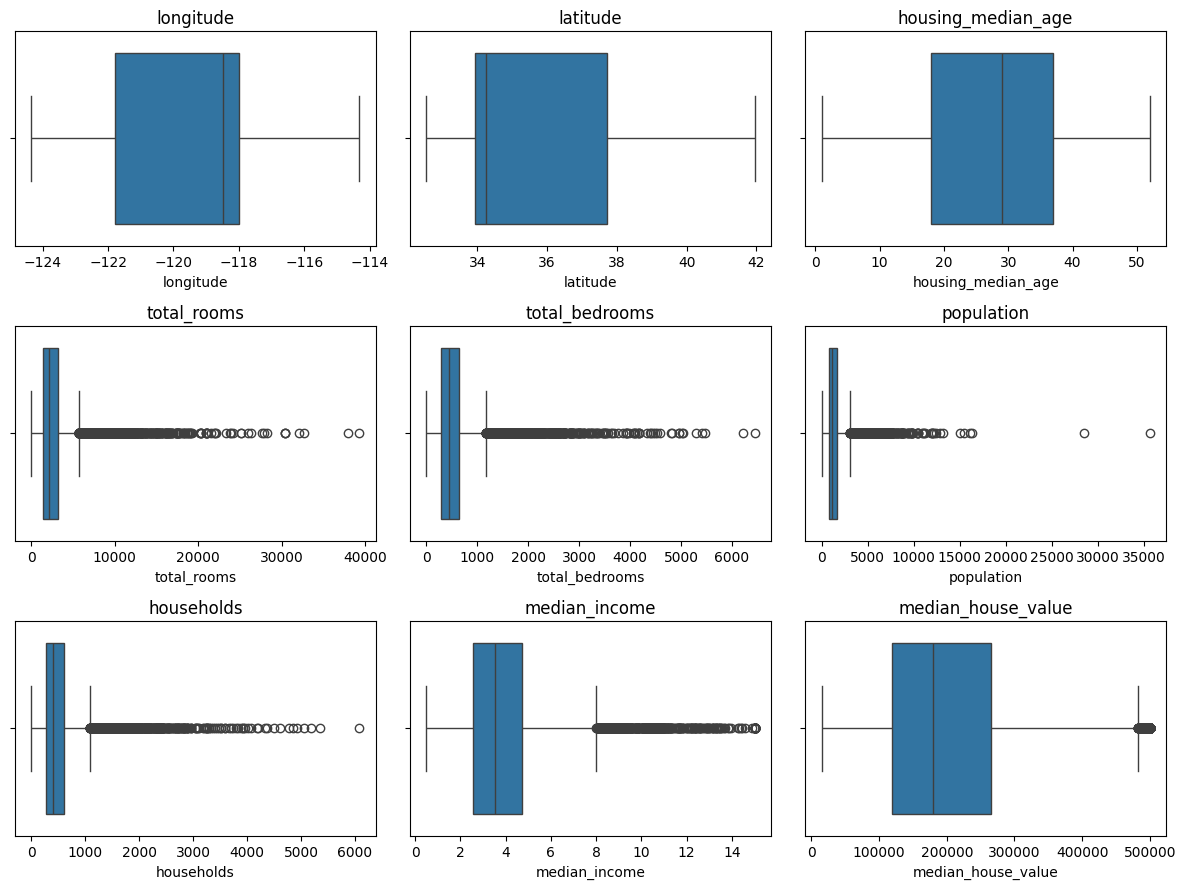

In [ ]:
# Построение box plot для числовых переменных
fig, axes = plt.subplots(3, 3, figsize=(12, 9))
axes = axes.flatten()

# Построение box plot для каждой числовой переменной
for i, column in enumerate(df.select_dtypes(include='number').columns):
    sns.boxplot(x=df[column], ax=axes[i])
    axes[i].set_title(f'{column}')

plt.tight_layout()
plt.show()

In [98]:
import numpy as np
from sklearn.preprocessing import RobustScaler

# 1. Удаление выбросов с использованием IQR для признаков с длинными хвостами
# Признаки, для которых применяем IQR
columns_iqr = ['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']

# Рассчитываем границы на основе IQR (межквартильного размаха)
Q1 = X_train[columns_iqr].quantile(0.01)  # Нижний 1-й перцентиль
Q3 = X_train[columns_iqr].quantile(0.99)  # Верхний 99-й перцентиль
IQR = Q3 - Q1
lower_bound_iqr = Q1 - 1.5 * IQR
upper_bound_iqr = Q3 + 1.5 * IQR

# Ограничиваем выбросы (усечение значений, выходящих за границы)
for col in columns_iqr:
    X_train[col] = X_train[col].clip(lower=lower_bound_iqr[col], upper=upper_bound_iqr[col])
    X_test[col] = X_test[col].clip(lower=lower_bound_iqr[col], upper=upper_bound_iqr[col])

# 2. Winsorization для менее проблемных признаков
# Признаки с минимальными выбросами
columns_winsor = ['longitude', 'latitude', 'housing_median_age']

# Рассчитываем границы Winsorization (1-й и 99-й перцентиль)
lower_bound = X_train[columns_winsor].quantile(0.01)
upper_bound = X_train[columns_winsor].quantile(0.99)

# Ограничиваем значения по этим границам
X_train[columns_winsor] = X_train[columns_winsor].clip(lower=lower_bound, upper=upper_bound, axis=1)
X_test[columns_winsor] = X_test[columns_winsor].clip(lower=lower_bound, upper=upper_bound, axis=1)

# 3. Масштабирование данных
# Применяем RobustScaler, чтобы масштабировать данные с учетом устойчивости к выбросам
scaler = RobustScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Результат готов (копируем для сохранности)
X_train_processed = X_train.copy()
X_test_processed = X_test.copy()

#### Посмотрим на выбросы теперь
(ура их нет)

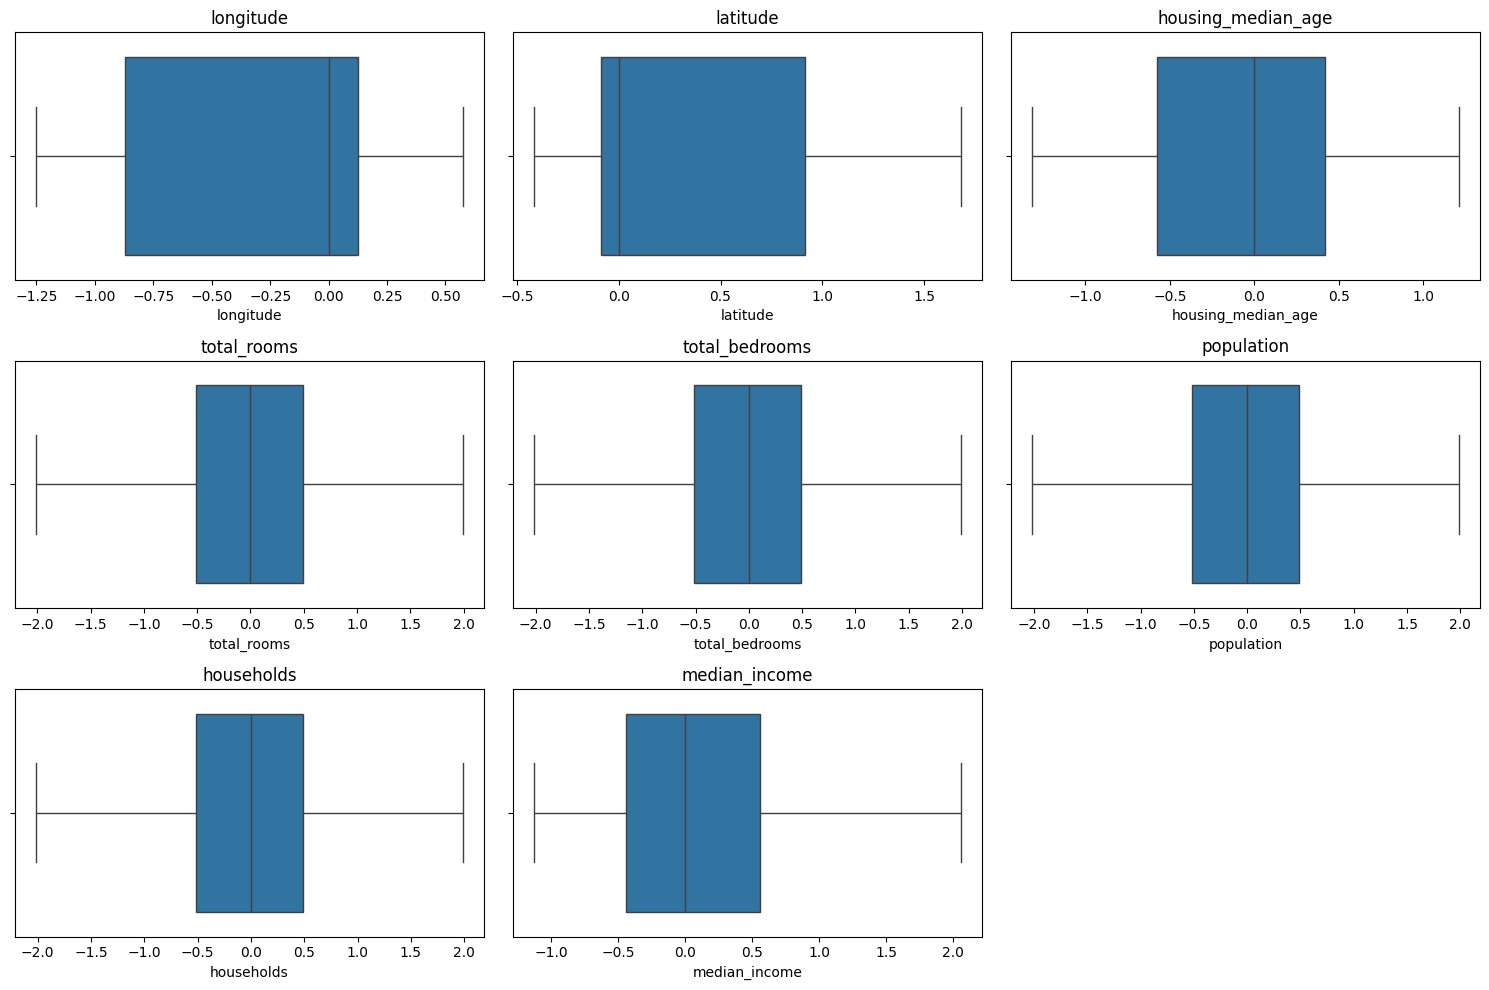

In [99]:
# Построение boxplot для числовых переменных после обработки
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
axes = axes.flatten()

# Выбор числовых переменных
numerical_columns = X_train_processed.select_dtypes(include='number').columns

# Построение box plot для каждой числовой переменной
for i, column in enumerate(numerical_columns):
    sns.boxplot(x=X_train_processed[column], ax=axes[i])
    axes[i].set_title(f'{column}')

# Убираем лишние пустые подграфики
for j in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


#### Обработка категориальных признаков с OneHotEncoder


In [106]:
from sklearn.preprocessing import OneHotEncoder

# Создаем копии обработанных данных
X_train_processed = X_train.copy()
X_test_processed = X_test.copy()

# Выделяем категориальные признаки
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Проверяем наличие пропущенных значений и заполняем их модой
for col in categorical_cols:
    X_train_processed[col] = X_train_processed[col].fillna(X_train_processed[col].mode()[0])
    X_test_processed[col] = X_test_processed[col].fillna(X_train_processed[col].mode()[0])

# Применяем One-Hot Encoding
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)  # Заменили sparse на sparse_output
encoded_train = encoder.fit_transform(X_train_processed[categorical_cols])
encoded_test = encoder.transform(X_test_processed[categorical_cols])

# Получаем имена новых столбцов из one-hot encoding
encoded_columns = encoder.get_feature_names_out(categorical_cols)

# Создаем DataFrame из закодированных данных
encoded_train_df = pd.DataFrame(encoded_train, columns=encoded_columns, index=X_train_processed.index)
encoded_test_df = pd.DataFrame(encoded_test, columns=encoded_columns, index=X_test_processed.index)

# Добавляем закодированные категориальные признаки к обработанным данным
X_train_processed = pd.concat([X_train_processed.drop(columns=categorical_cols), encoded_train_df], axis=1)
X_test_processed = pd.concat([X_test_processed.drop(columns=categorical_cols), encoded_test_df], axis=1)

print(encoded_columns)

['ocean_proximity_<1H OCEAN' 'ocean_proximity_INLAND'
 'ocean_proximity_ISLAND' 'ocean_proximity_NEAR BAY'
 'ocean_proximity_NEAR OCEAN']


#### Обучение линейной регресии на данных обработанных более детально

In [112]:
# Обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train_processed, y_train)

# Предсказания на тестовой выборке
y_pred = model.predict(X_test_processed)
# Оценка качества модели
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Вывод результатов
print("Качество модели линейной регрессии:")
print(f"MSE: {mse:.2f}, MAE: {mae:.2f}, R^2: {r2:.2f}")

Качество модели линейной регрессии:
MSE: 4446211045.72, MAE: 49269.49, R^2: 0.67


### **Вывод по лабораторной работе**

#### **Сравнение результатов двух пайплайнов**
| **Часть** | **MSE**             | **MAE**       | **R²**  | **Ключевые изменения в пайплайне**                                   |
|------------|---------------------|---------------|---------|------------------------------------------------------------------------|
| **Часть 1** | 4,998,677,973.81   | 51,079.21     | 0.63    | Пропуски заполнены средним, масштабирование StandardScaler, OneHotEncoding |
| **Часть 2** | 4,446,211,045.72   | 49,269.49     | 0.67    | Пропуски заполнены медианой, обработка выбросов, масштабирование RobustScaler, OneHotEncoding |

#### **Анализ результатов**
1. **Среднеквадратическая ошибка (MSE)** снизилась на ~11%, что указывает на улучшение предсказательной способности модели для крупных ошибок.
2. **Средняя абсолютная ошибка (MAE)** также уменьшилась на ~4%, что говорит о повышении точности модели в среднем.
3. **Коэффициент детерминации (R²)** увеличился с 0.63 до 0.67, что демонстрирует лучшее объяснение дисперсии целевой переменной моделью.

#### **Итак...**
Во второй части пайплайна, благодаря обработке выбросов (IQR, Winsorization), замене пропусков медианой, и использованию более устойчивого метода масштабирования (RobustScaler), удалось добиться улучшения качества модели линейной регрессии. Обработка выбросов и использование медианы позволили снизить влияние экстремальных значений, а RobustScaler обеспечил устойчивость к оставшимся выбросам. Эти изменения сделали модель более точной и устойчивой, что подтверждается улучшением всех метрик.

Рекомендуется использовать подход из Часть 2 для данных с выбросами и сильной асимметрией.